In [597]:
import time
import random
from math import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale =1.5)

# Week 1, 1

In [733]:
train = pd.read_csv('train real estate.csv')                  # import dataset
test = pd.read_csv('test real estate.csv')

In [599]:
train.columns                                                

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [600]:
test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [601]:
len(train)

27321

In [602]:
len(test)

11709

In [603]:
train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [604]:
train.set_index('UID',inplace = True)
test.set_index('UID',inplace=True)

In [605]:
train.describe()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,6.521754e+06,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,2.186781e+08,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,0.000000e+00,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,2.756300e+04,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,5.239880e+05,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027487,0.129000
max,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,2.453228e+10,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [606]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BLOCKID                      0 non-null      float64
 1   SUMLEVEL                     27321 non-null  int64  
 2   COUNTYID                     27321 non-null  int64  
 3   STATEID                      27321 non-null  int64  
 4   state                        27321 non-null  object 
 5   state_ab                     27321 non-null  object 
 6   city                         27321 non-null  object 
 7   place                        27321 non-null  object 
 8   type                         27321 non-null  object 
 9   primary                      27321 non-null  object 
 10  zip_code                     27321 non-null  int64  
 11  area_code                    27321 non-null  int64  
 12  lat                          27321 non-null  float64
 13  lng       

# WEEK 1, 3

In [607]:
train.isna().sum().sort_values(ascending=False).head(20)                    # Checking missing value in training dataset   

BLOCKID                        27321
hc_sample_weight                 600
hc_mean                          600
hc_median                        600
hc_stdev                         600
hc_samples                       600
hc_mortgage_median               573
hc_mortgage_stdev                573
hc_mortgage_sample_weight        573
hc_mortgage_samples              573
hc_mortgage_mean                 573
second_mortgage                  457
debt_cdf                         457
home_equity_cdf                  457
second_mortgage_cdf              457
debt                             457
home_equity                      457
home_equity_second_mortgage      457
rent_gt_20                       314
rent_mean                        314
dtype: int64

In [608]:
test.isna().sum().sort_values(ascending=False).head(20)                # checking missing values in test dataest

BLOCKID                        11709
hc_sample_weight                 290
hc_mean                          290
hc_median                        290
hc_stdev                         290
hc_samples                       290
hc_mortgage_median               268
hc_mortgage_stdev                268
hc_mortgage_sample_weight        268
hc_mortgage_samples              268
hc_mortgage_mean                 268
second_mortgage                  220
home_equity_second_mortgage      220
debt_cdf                         220
home_equity_cdf                  220
second_mortgage_cdf              220
debt                             220
home_equity                      220
rent_gt_35                       149
rent_gt_10                       149
dtype: int64

In [609]:
fill_rate_train = 100 -((train.isnull().sum() *100)/len(train))     # return series
fill_rate_train=pd.DataFrame(fill_rate_train,columns=['Fill rate'])      # Series to Dataframe
fill_rate_train.sort_values(by=['Fill rate'],inplace=True,ascending=True)

In [610]:
fill_rate_train

,Fill rate
BLOCKID,0.000000
hc_mean,97.803887
hc_median,97.803887
hc_stdev,97.803887
hc_sample_weight,97.803887
...,...
city,100.000000
place,100.000000
type,100.000000
zip_code,100.000000


In [611]:
fill_rate_test = 100 -((test.isnull().sum() *100)/len(test))     # return series
fill_rate_test=pd.DataFrame(fill_rate_test,columns=['Fill rate'])      # Series to Dataframe
fill_rate_test.sort_values(by=['Fill rate'],inplace=True,ascending=True)

In [612]:
fill_rate_test

,Fill rate
BLOCKID,0.000000
hc_mean,97.523273
hc_median,97.523273
hc_stdev,97.523273
hc_sample_weight,97.523273
...,...
city,100.000000
SUMLEVEL,100.000000
COUNTYID,100.000000
lat,100.000000


In [388]:
# type(fill_rate_test)

# SUMLEVEL can be dropped as it is same for everyone.
# BLOCKID can be dropped, since it is 100% missing values in both train and test data set

In [613]:
train.drop(columns=['BLOCKID','SUMLEVEL'],inplace = True)
test.drop(columns=['BLOCKID','SUMLEVEL'],inplace = True)

In [614]:
# check columns with missing values

mis_train_col=[]
for col in train.columns:
    if train[col].isna().sum() !=0:
         mis_train_col.append(col)
print(mis_train_col)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [615]:
train[mis_train_col]

,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,439.42839,419.0,140.29970,170.00000,170.0,1.00000,1.00000,1.00000,0.83333,0.79012,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
277856,1813.19253,1788.0,492.92300,64.84927,471.0,0.85435,0.63261,0.50000,0.37391,0.30870,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
233000,849.39107,834.0,336.47530,120.91448,195.0,0.93846,0.71282,0.54359,0.44615,0.29744,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712


In [616]:
mis_test_col=[]
for col in test.columns:
    if test[col].isna().sum() !=0:
         mis_test_col.append(col)
print(mis_test_col)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [617]:
test[mis_test_col]

,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238088,1458.82449,1603.0,566.90682,29.43733,99.0,1.00000,1.00000,1.00000,0.62626,0.62626,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
242811,700.53513,661.0,254.66700,480.86455,592.0,1.00000,0.90034,0.85911,0.63058,0.53952,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
250127,1069.70567,1138.0,488.13975,207.29615,506.0,0.85375,0.83004,0.77273,0.56324,0.47431,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294


In [618]:
num_mis_train = train[mis_train_col].select_dtypes(include=[np.number])

cat_mis_train = train[mis_train_col].select_dtypes(exclude=[np.number])

In [396]:
num_mis_train.columns

Index(['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight',

In [619]:
cat_mis_train.columns

Index([], dtype='object')

In [620]:
num_mis_test = test[mis_test_col].select_dtypes(include=[np.number])

cat_mis_test = test[mis_test_col].select_dtypes(exclude=[np.number])

In [399]:
num_mis_test.columns

Index(['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight',

In [621]:
cat_mis_test.columns

Index([], dtype='object')

# Missing cols are all numerical variables in both train and test data.
# As all variable are numerical so replacing missing value with mean value.

In [623]:
for col in train.columns:
    if col in (mis_train_col):
        train[col].replace(np.nan, train[col].mean(),inplace=True)

        
        
for col in test.columns:
    if col in (mis_test_col):
        test[col].replace(np.nan, test[col].mean(),inplace=True)

In [624]:
train.isna().sum().sum()

0

In [625]:
test.isna().sum().sum()

0

# Week 1, 4.a

In [405]:
pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\quantum\anaconda3\lib\site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [626]:
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
train_location_mort_pct=pysqldf(q1)

In [627]:
train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [628]:
import plotly.express as px
import plotly.graph_objects as go

In [629]:
fig = go.Figure(data=go.Scattergeo(
    lat = train_location_mort_pct['lat'],
    lon = train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        showlakes = True,
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

In [630]:
top_2500_train = train[(train['pct_own']>0.1) & (train['second_mortgage']<0.5) ][:2500]

# Week 1, 4.a    # with geo pandas

In [631]:
import geopandas as gpd

In [632]:
import plotly.express as px

In [633]:
train_geo = gpd.GeoDataFrame(top_2500_train, geometry = gpd.points_from_xy(top_2500_train.lng,top_2500_train.lat))

In [634]:
train_geo

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,geometry
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,45.333330,22.512760,685.338450,2618.000000,0.790460,0.57851,0.018820,0.012400,0.087700,POINT (-75.50152 42.84081)
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,37.583330,23.433530,267.233670,1284.000000,0.524830,0.34886,0.014260,0.014260,0.090300,POINT (-86.26661 41.70144)
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.833330,23.941190,707.019630,3238.000000,0.853310,0.64745,0.028300,0.016070,0.106570,POINT (-86.51525 39.79220)
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,50.583330,24.320150,362.201930,1559.000000,0.650370,0.47257,0.020210,0.020210,0.101060,POINT (-66.10417 18.39610)
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,21.583330,11.104840,1854.486520,3051.000000,0.130460,0.12356,0.000000,0.000000,0.031090,POINT (-96.56937 39.19557)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242909,31,17,Illinois,IL,Chicago,Evergreen Park,Village,tract,60620,773,...,46.916670,23.580630,684.359960,2961.000000,0.674770,0.41302,0.082370,0.062790,0.061060,POINT (-87.66983 41.74056)
247528,1,21,Kentucky,KY,Columbia,Columbia City,City,tract,42728,270,...,36.666670,22.663790,170.730260,719.000000,0.776870,0.56680,0.022270,0.022270,0.109310,POINT (-85.26203 37.00147)
221196,89,1,Alabama,AL,Huntsville,Gurley,Town,tract,35811,256,...,39.083330,23.709100,723.750750,2925.000000,0.831080,0.71177,0.058390,0.025020,0.061170,POINT (-86.40577 34.78274)


In [635]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

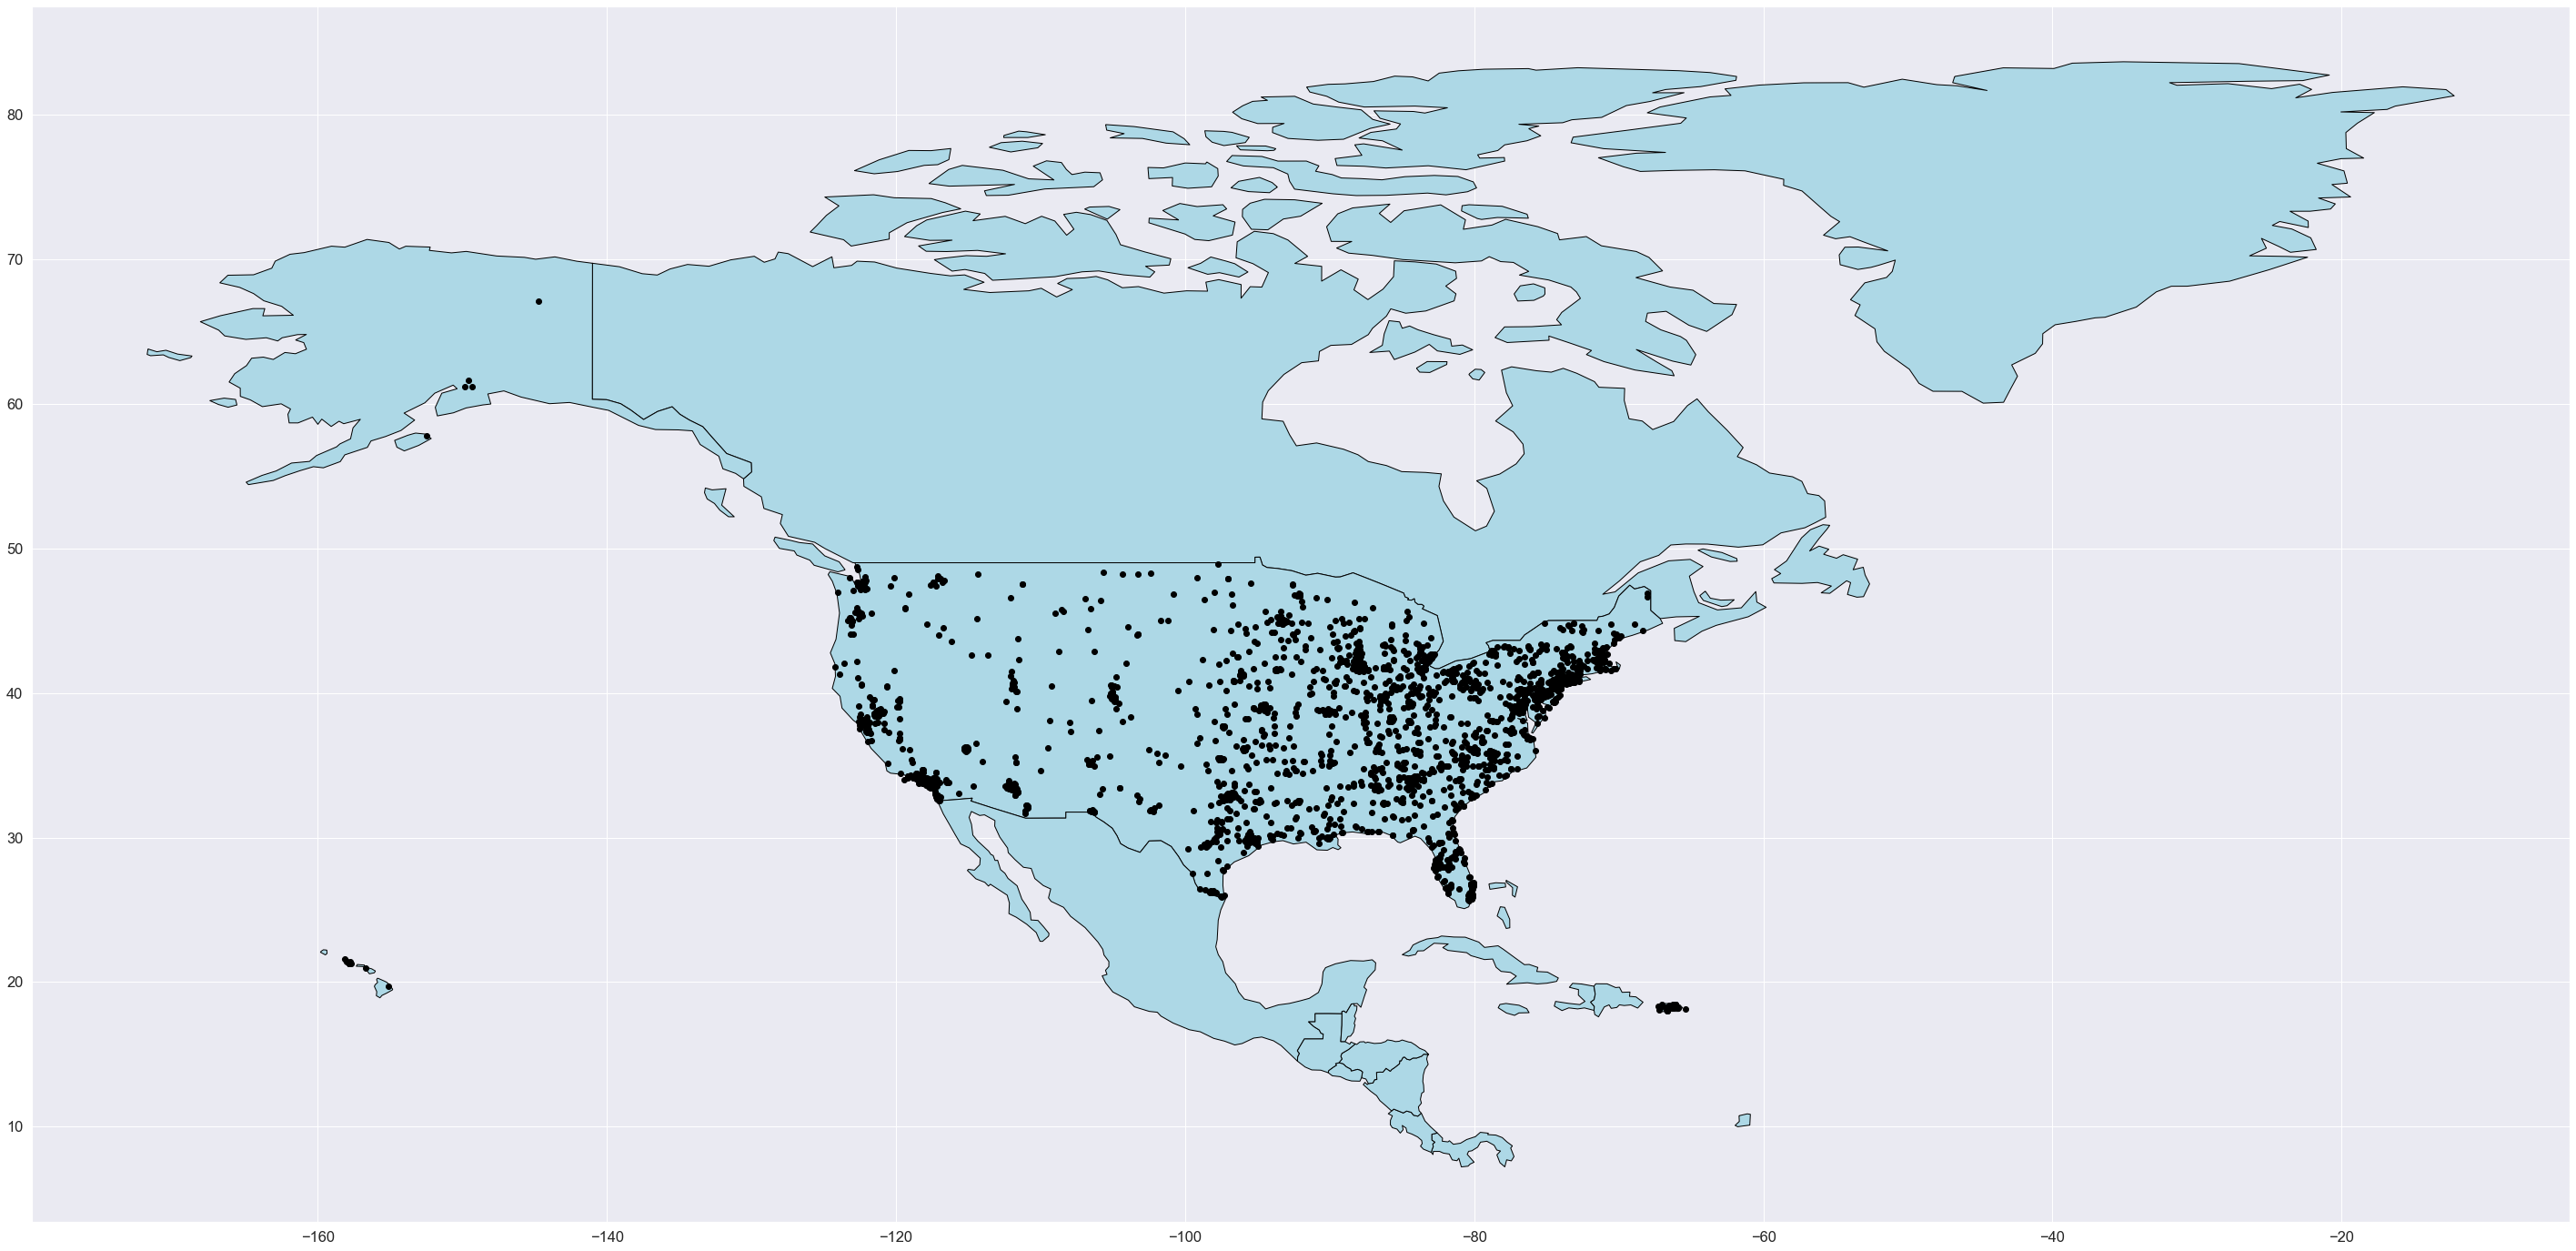

In [636]:
axis = world_data[world_data.continent == 'North America'].plot(color = 'lightblue',edgecolor = 'black')

train_geo.plot(ax=axis,color='black')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(50,30)
fig.savefig('matplot.png',dpi=200)
plt.show()

# WEEK 1, 4.b

In [637]:
train['bad_debt']=train['second_mortgage']+train['home_equity']-train['home_equity_second_mortgage']
train['bad_debt']


UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debt, Length: 27321, dtype: float64

In [638]:
train['bad_debt'].max()

1.0

In [639]:
train['bad_debt'].min()

0.0

# bad_debt column is continuos so creating bins

# Week 1, 4.c

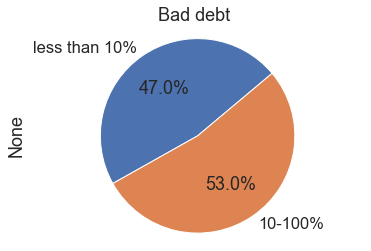

In [641]:
train['bins'] = pd.cut(train['bad_debt'],bins=[0,0.1,1], labels=["less than 10%","10-100%"])
train.groupby(['bins']).size().plot(kind='pie',subplots=False,startangle=40, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Bad debt ')
plt.show()

Week 1, 4.d

In [642]:
cols=['second_mortgage','home_equity','debt','bad_debt','city']


In [643]:
train[cols].sort_values(by='city')

,second_mortgage,home_equity,debt,bad_debt,city
UID,,,,,
220856,0.02948,0.05037,0.44103,0.05037,Abbeville
220855,0.05396,0.06115,0.54317,0.06115,Abbeville
280088,0.03917,0.05167,0.43917,0.05167,Abbeville
249727,0.01019,0.02963,0.45648,0.02963,Abbeville
249726,0.03796,0.08385,0.51048,0.08385,Abbeville
...,...,...,...,...,...
245371,0.00840,0.17861,0.82923,0.17861,Zionsville
273634,0.01789,0.19789,0.67684,0.20736,Zoarville
235512,0.00357,0.02262,0.29524,0.02262,Zolfo Springs


C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



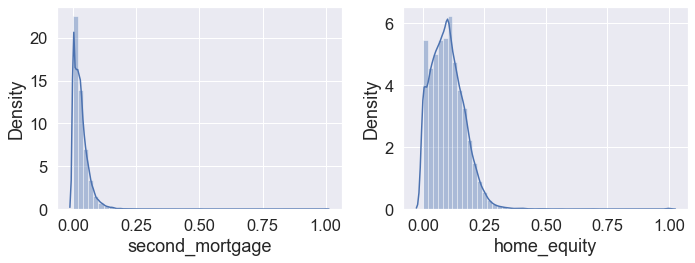

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



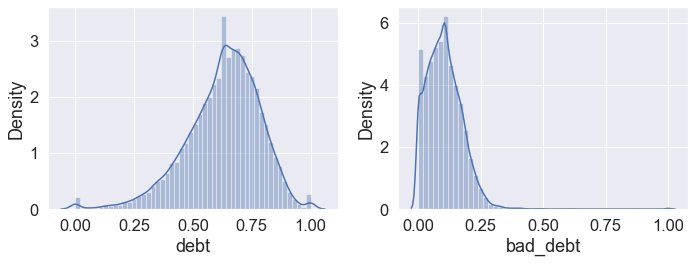

In [644]:
import seaborn as sns

num_cols = ['second_mortgage','home_equity','debt','bad_debt']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(train[num_cols[i]], kde=True)
        plt.subplot(122)            
        sns.distplot(train[num_cols[i+1]], kde=True)
        plt.tight_layout()
        plt.show()

In [430]:
#sns.countplot('city', data=train[cols])

In [645]:
train[cols]['city'].unique().tolist()

['Hamilton',
 'South Bend',
 'Danville',
 'San Juan',
 'Manhattan',
 'Trinity',
 'Nocona',
 'Taylors',
 'South Richmond Hill',
 'Rancho Palos Verdes',
 'Los Angeles',
 'Coronado',
 'Hot Springs',
 'Abingdon',
 'Lewisville',
 'Streator',
 'West Des Moines',
 'Nashville',
 'Champaign',
 'Brooklyn',
 'San Marcos',
 'Las Vegas',
 'Sunset',
 'Fort Collins',
 'Pawtucket',
 'Camden',
 'Egg Harbor Township',
 'Eagle Creek',
 'Santa Clarita',
 'Mesa',
 'Opa Locka',
 'Green Bay',
 'Philadelphia',
 'Morrisville',
 'Rocky Mount',
 'Dorchester',
 'Monroe',
 'Peebles',
 'San Antonio',
 'Harahan',
 'Yukon',
 'Molalla',
 'Ossineke',
 'Columbia',
 'Vestal',
 'Vista',
 'Stockton',
 'Madrid',
 'Corona',
 'Greensboro',
 'Knoxville',
 'Tucson',
 'St Anthony',
 'Norman',
 'Eagle Butte',
 'Palm Springs',
 'Flagstaff',
 'West Milton',
 'Flower Mound',
 'Selma',
 'Lumberton',
 'Tustin',
 'Pasadena',
 'Slayton',
 'Starks',
 'Ava',
 'Grand Prairie',
 'Pomona',
 'Jamaica',
 'Poplarville',
 'Oakland',
 'Livingston

In [646]:
# lets choose 5 any random cities to comare 
Chicago=train[cols].loc[train[cols]['city'] == 'Hamilton']
Manhattan=train[cols].loc[train[cols]['city'] == 'Manhattan']
Seattle = train[cols].loc[train[cols]['city']=='Seattle']
Brooklyn = train[cols].loc[train[cols]['city'] == 'Brooklyn']
Longview = train[cols].loc[train[cols]['city']=='Longview']
rand_5_city =pd.concat([Chicago,Manhattan,Seattle,Brooklyn,Longview])

rand_5_city

,second_mortgage,home_equity,debt,bad_debt,city
UID,,,,,
267822,0.02077,0.08919,0.52963,0.09408,Hamilton
263797,0.03021,0.16909,0.74550,0.18071,Hamilton
270979,0.04743,0.15005,0.70571,0.15005,Hamilton
259028,0.00000,0.02130,0.37870,0.02130,Hamilton
270984,0.00900,0.15651,0.59972,0.15651,Hamilton
...,...,...,...,...,...
285108,0.00000,0.04677,0.56688,0.04677,Longview
291051,0.00862,0.06491,0.63895,0.06491,Longview
285103,0.01208,0.03323,0.39426,0.03323,Longview


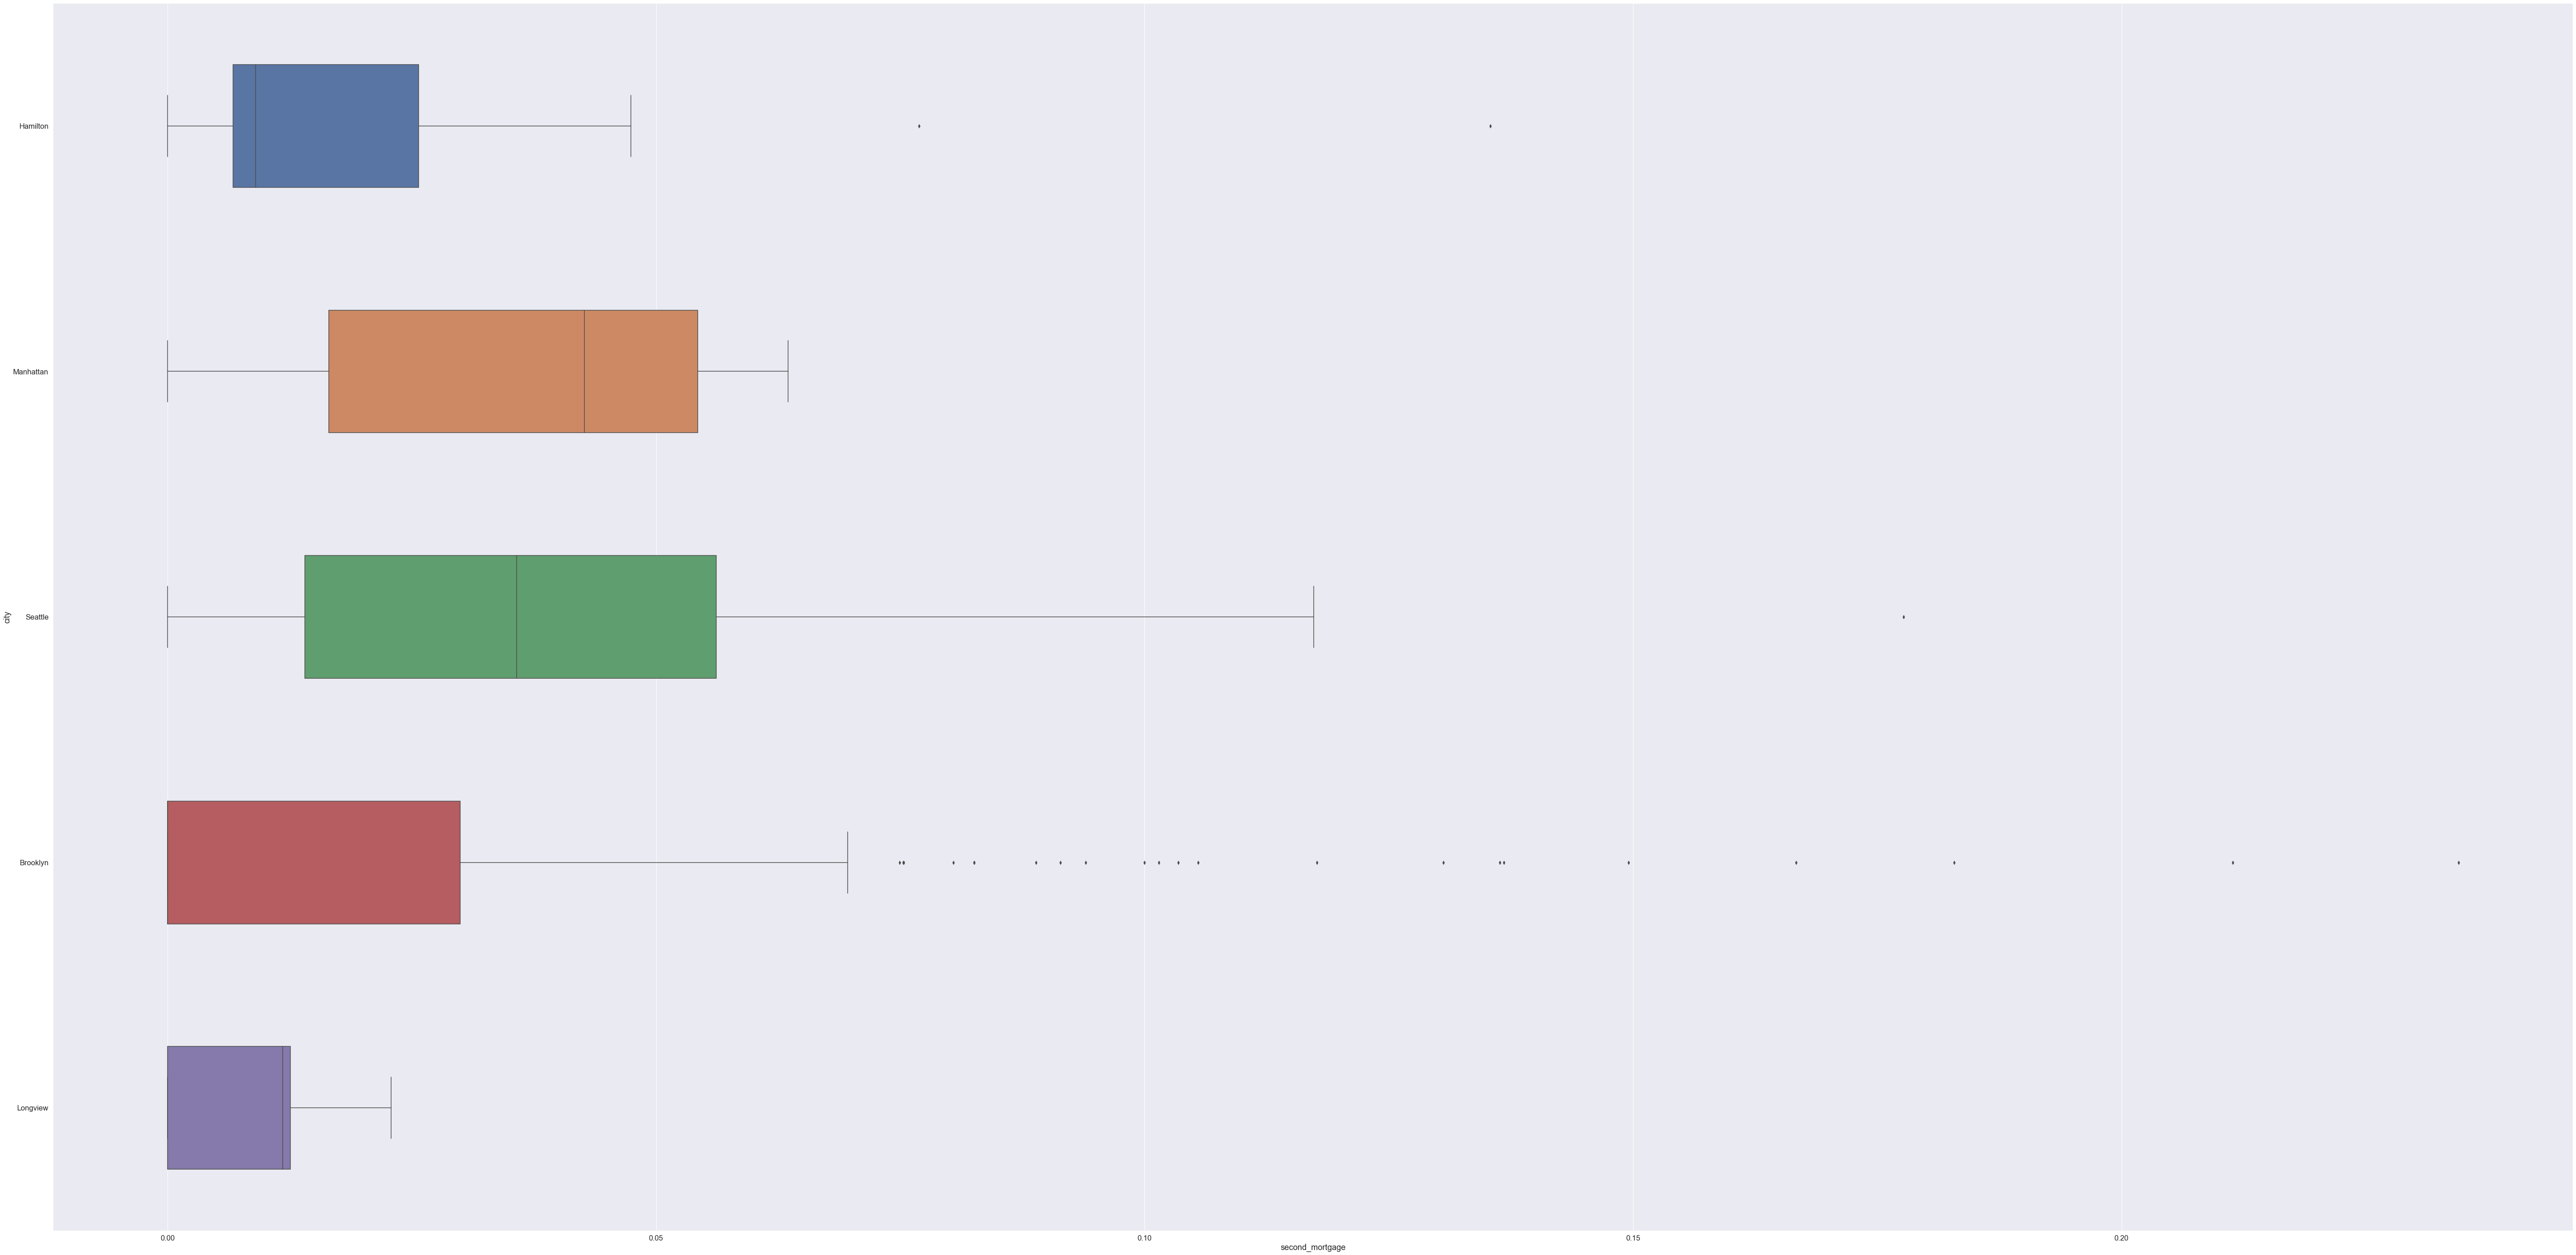

In [647]:
plt.figure(figsize=(100,50))
sns.boxplot(data=rand_5_city,x='second_mortgage', y='city',width=0.5)
plt.show()

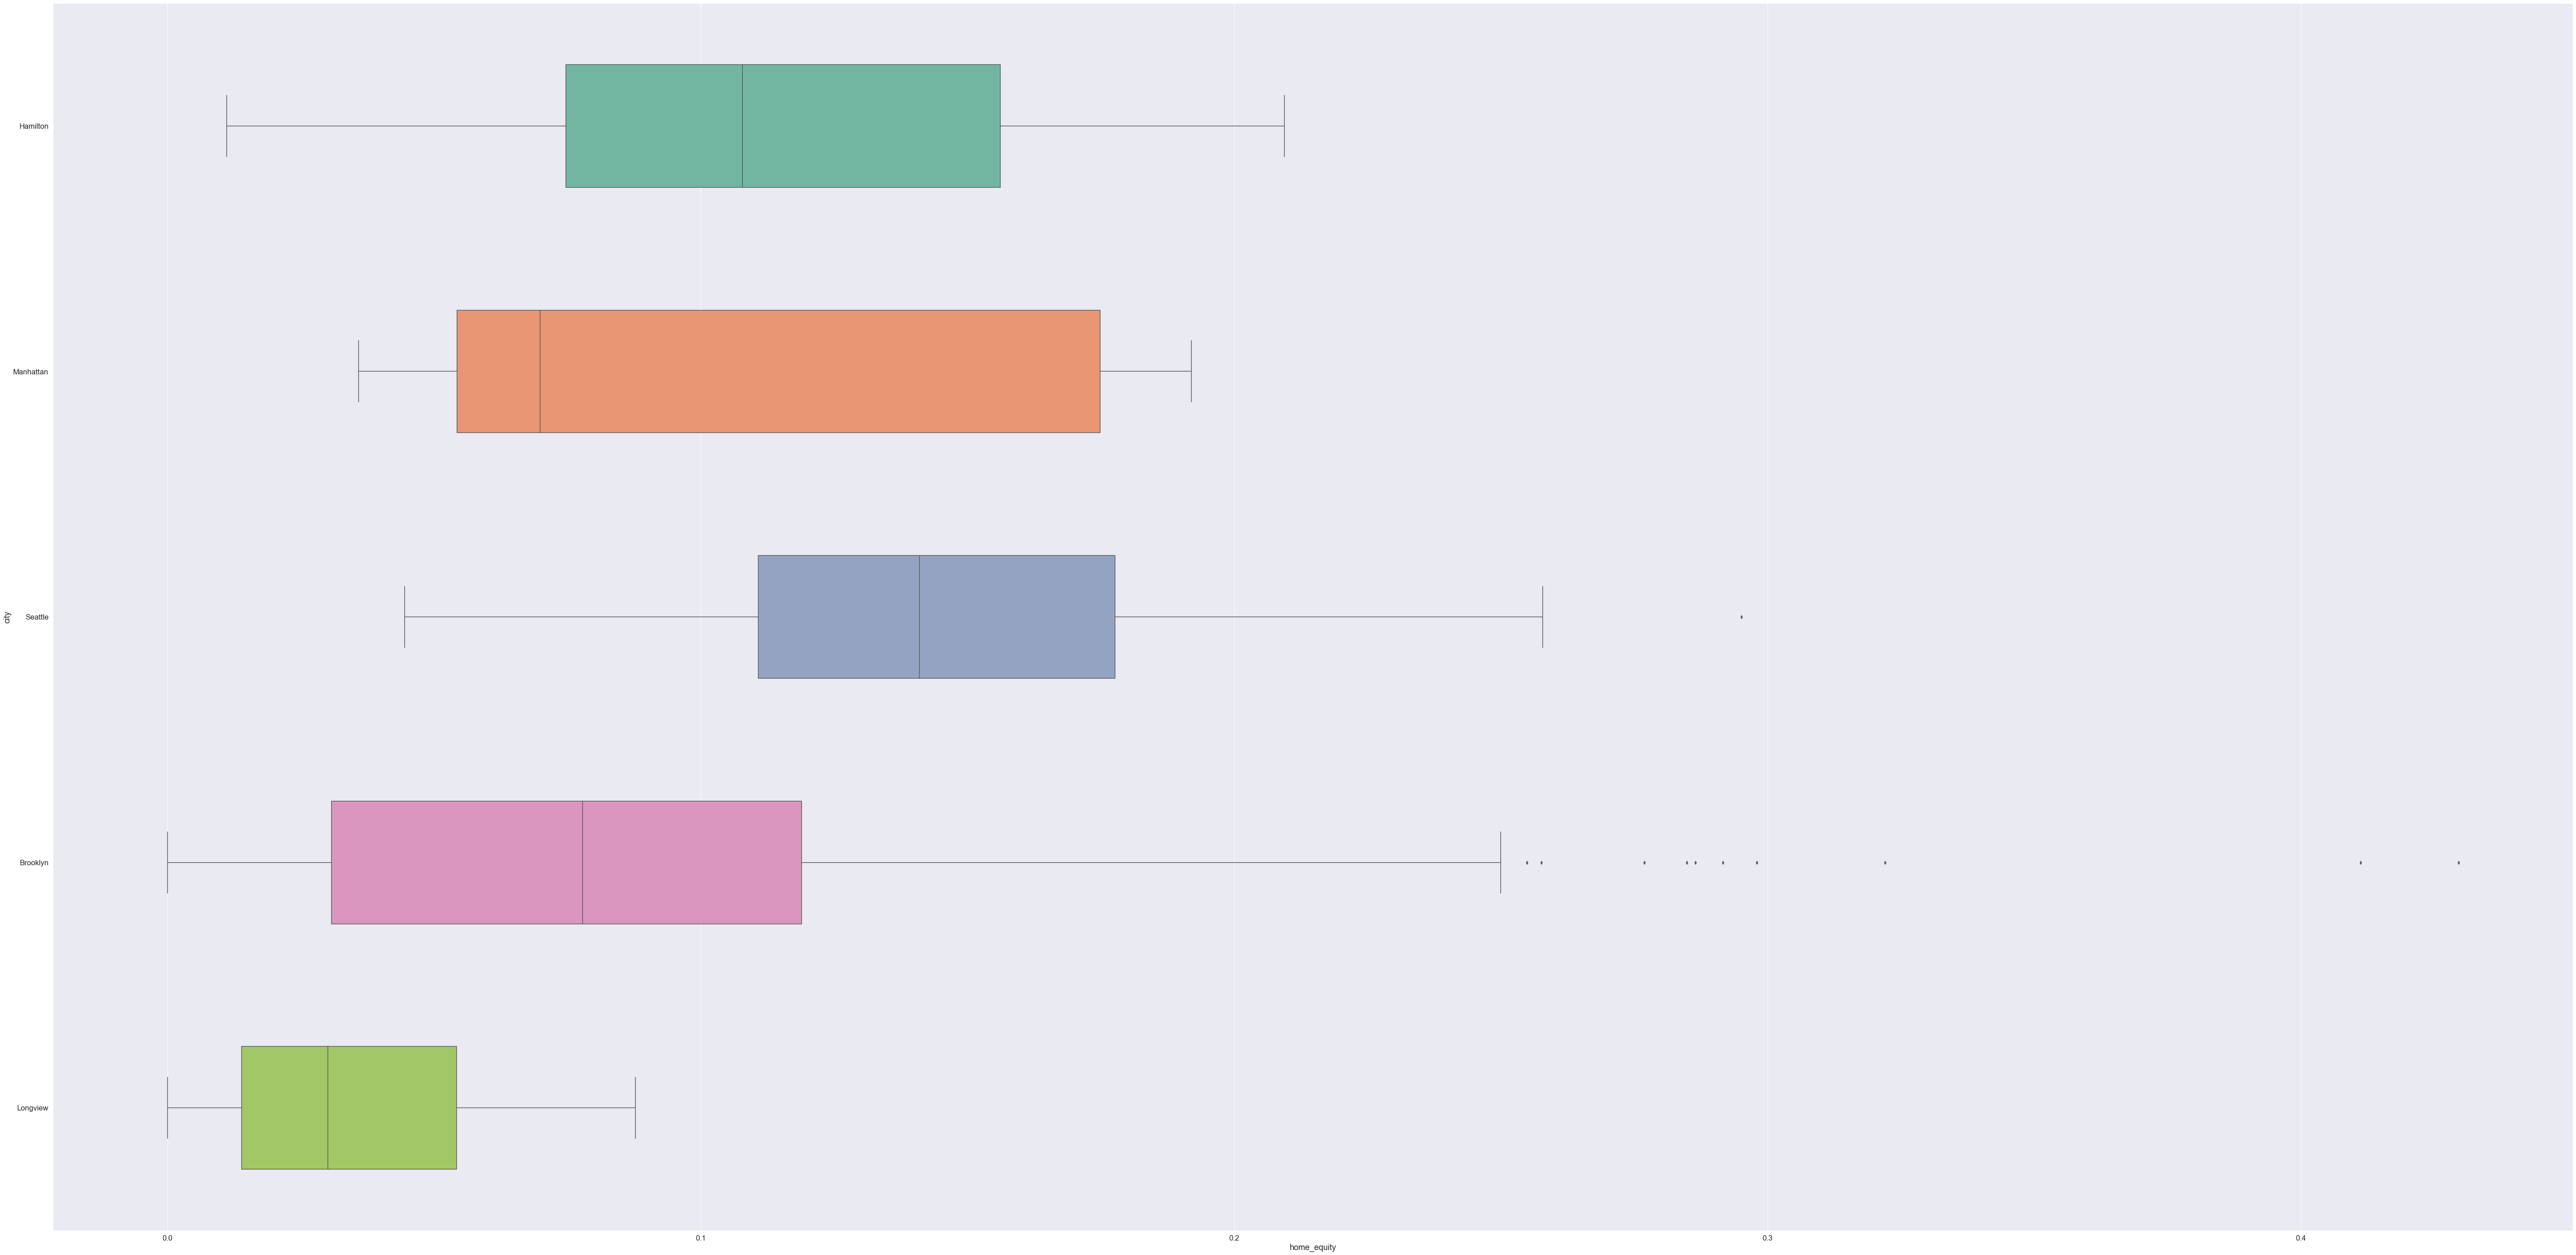

In [648]:
plt.figure(figsize=(100,50))
sns.boxplot(data=rand_5_city,x='home_equity', y='city',width=0.5,palette="Set2")
plt.show()

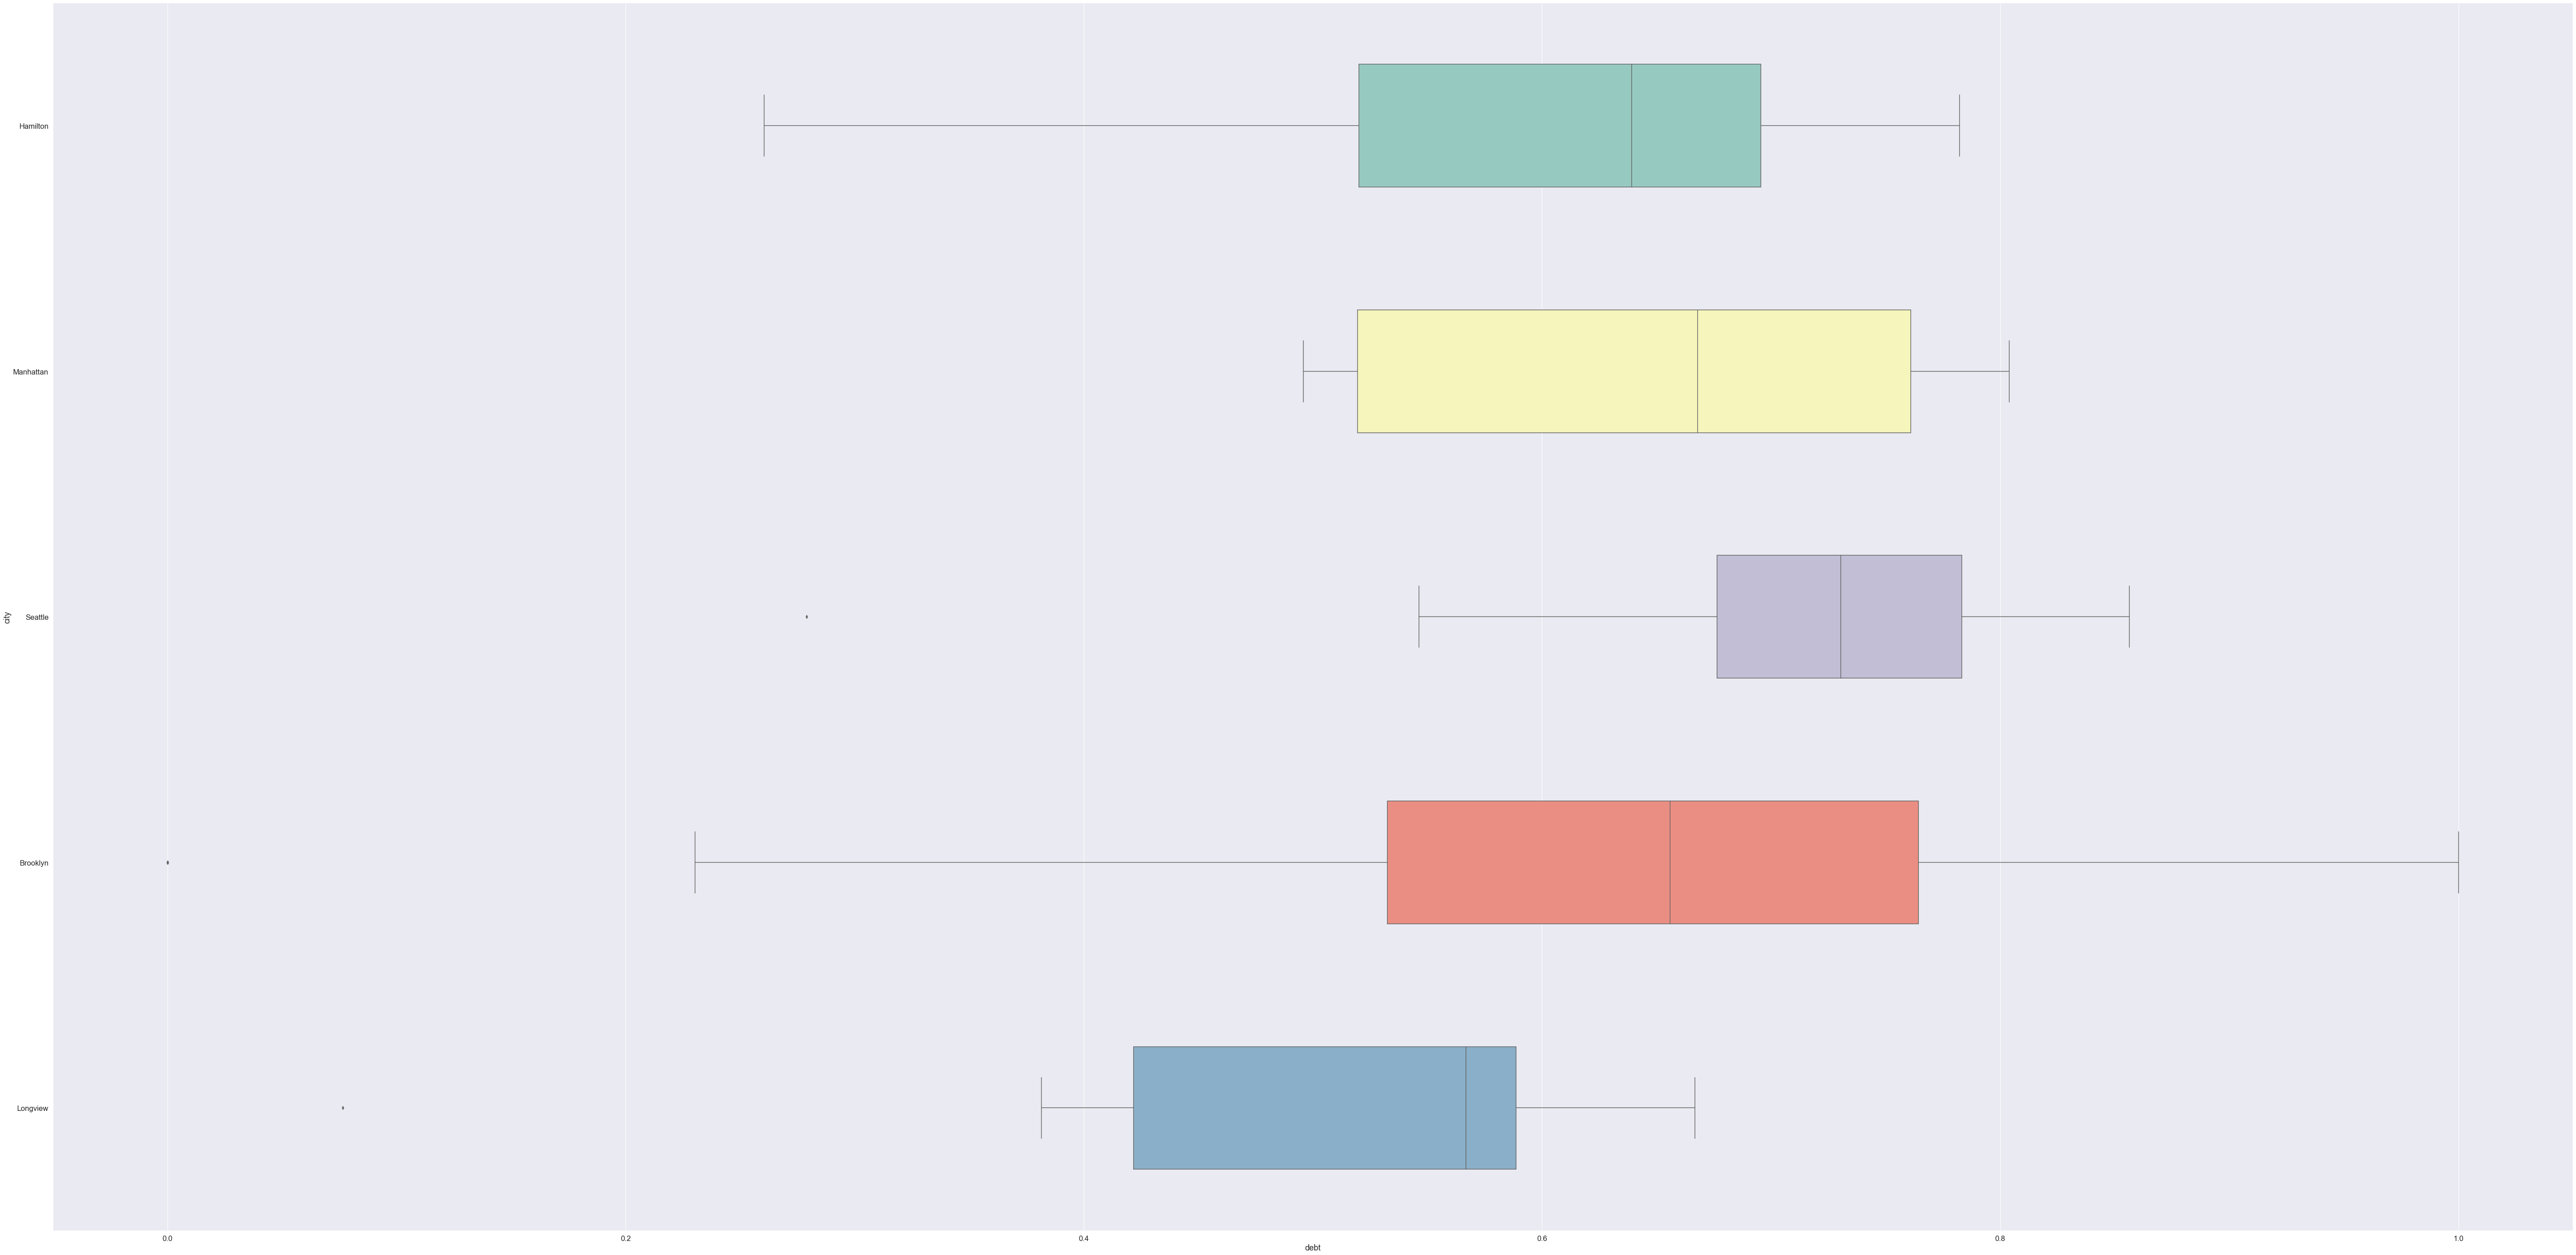

In [649]:
plt.figure(figsize=(100,50))
sns.boxplot(data=rand_5_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

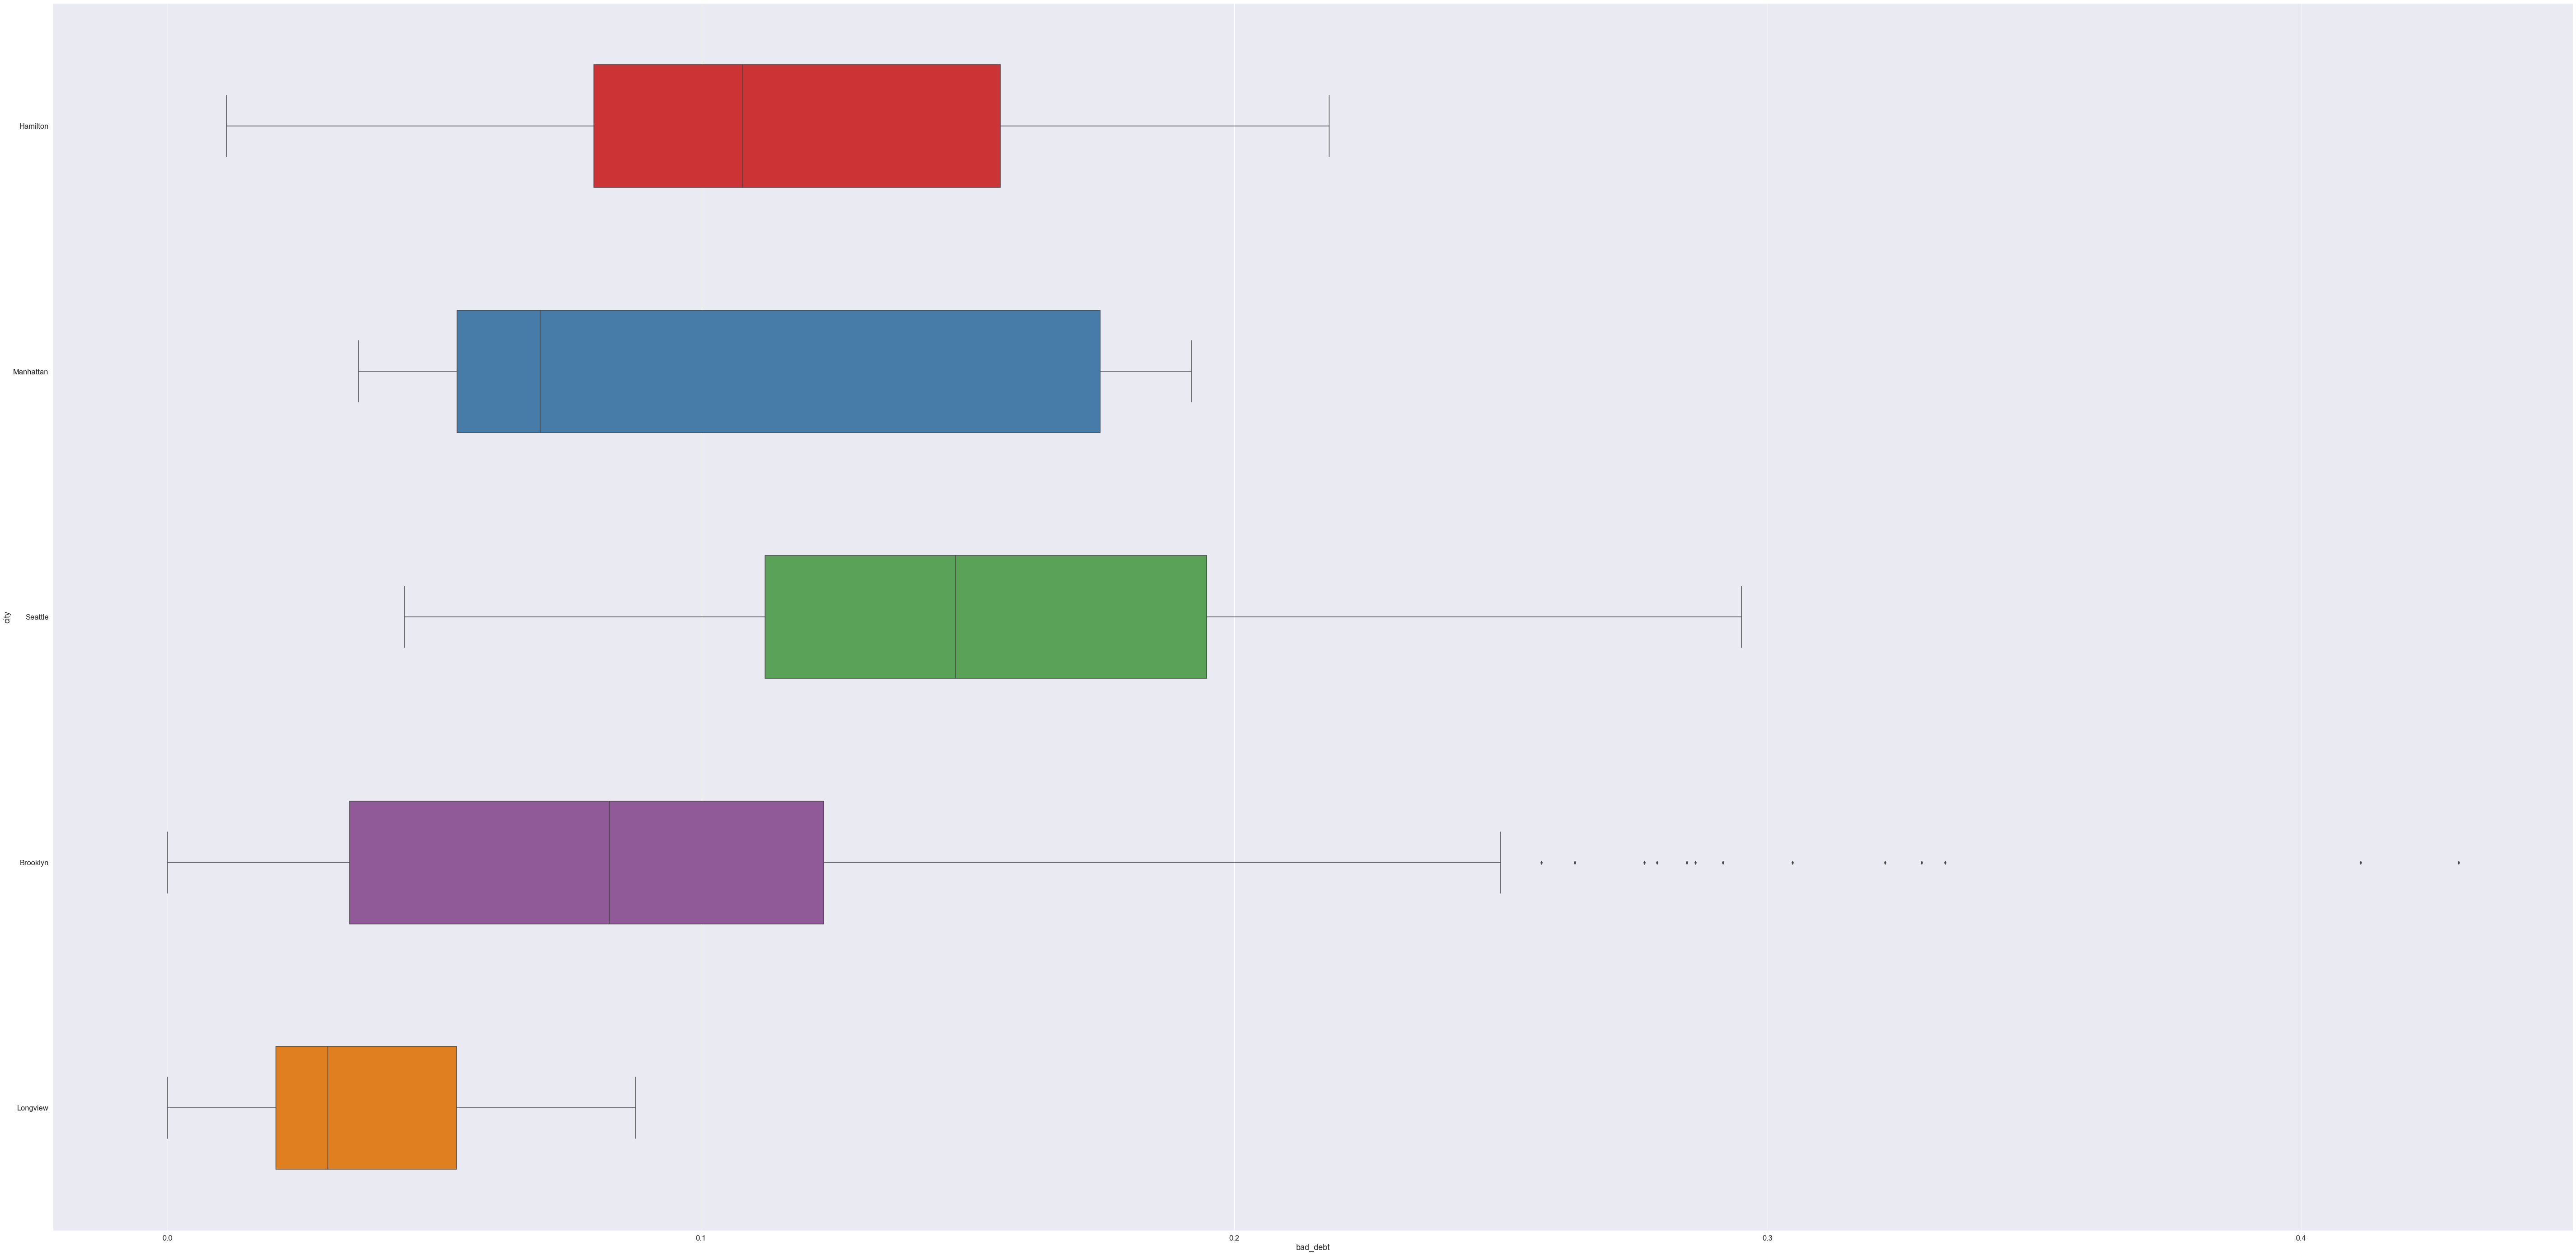

In [650]:
plt.figure(figsize=(100,50))
sns.boxplot(data=rand_5_city,x='bad_debt', y='city',width=0.5,palette="Set1")
plt.show()

Week 1, 4.e

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



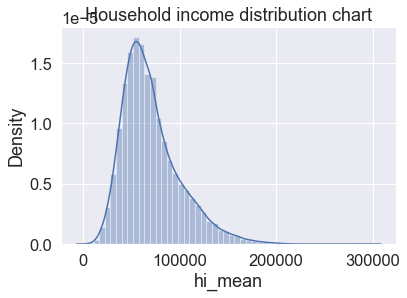

In [651]:
sns.distplot(train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



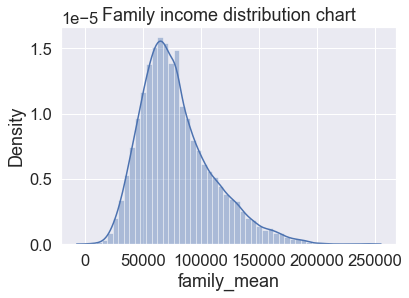

In [652]:
sns.distplot(train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



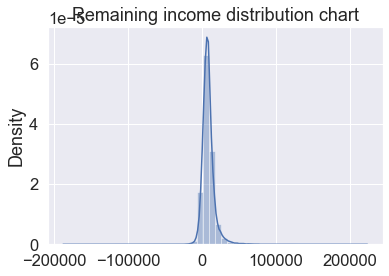

In [653]:
sns.distplot(train['family_mean']-train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

WEEK 2

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



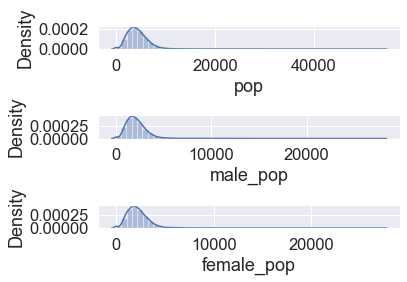

In [654]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(train['pop'],ax=ax1)
sns.distplot(train['male_pop'],ax=ax2)
sns.distplot(train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

Week 2, 1.a

In [655]:
train['pop_density']=train['pop']/train['ALand']

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



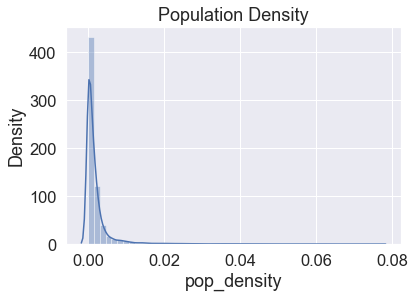

In [656]:
sns.distplot(train['pop_density'])
plt.title('Population Density')
plt.show() 

Week 2, 1.b

In [659]:
train['age_median']=(train['male_age_median']+train['female_age_median'])/2
test['age_median']=(test['male_age_median']+test['female_age_median'])/2

In [660]:
train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


Week 2, 1.c

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



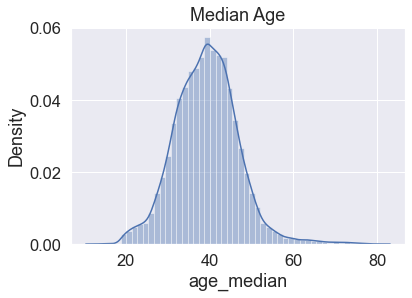

In [661]:
sns.distplot(train['age_median'])
plt.title('Median Age')
plt.show()

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



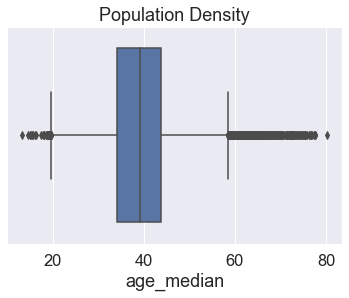

In [662]:
sns.boxplot(train["age_median"])
plt.title("Population Density")
plt.show()

# age is almost normally distributed, 
# mostly people are around 40

In [664]:
train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [665]:
train['pop_bins']=pd.cut(train['pop'],bins=5,labels=['child','Adults','Middle aged','Old age','Very old'])
train[['pop','pop_bins']]


,pop,pop_bins
UID,,
267822,5230,child
246444,2633,child
245683,6881,child
279653,2700,child
247218,5637,child
...,...,...
279212,1847,child
277856,4155,child
233000,2829,child


In [666]:
x = train.groupby(by='pop_bins')[['married','separated','divorced']].count()
x

,married,separated,divorced
pop_bins,,,
child,27058,27058,27058
Adults,246,246,246
Middle aged,9,9,9
Old age,7,7,7
Very old,1,1,1


<AxesSubplot:xlabel='pop_bins', ylabel='count'>

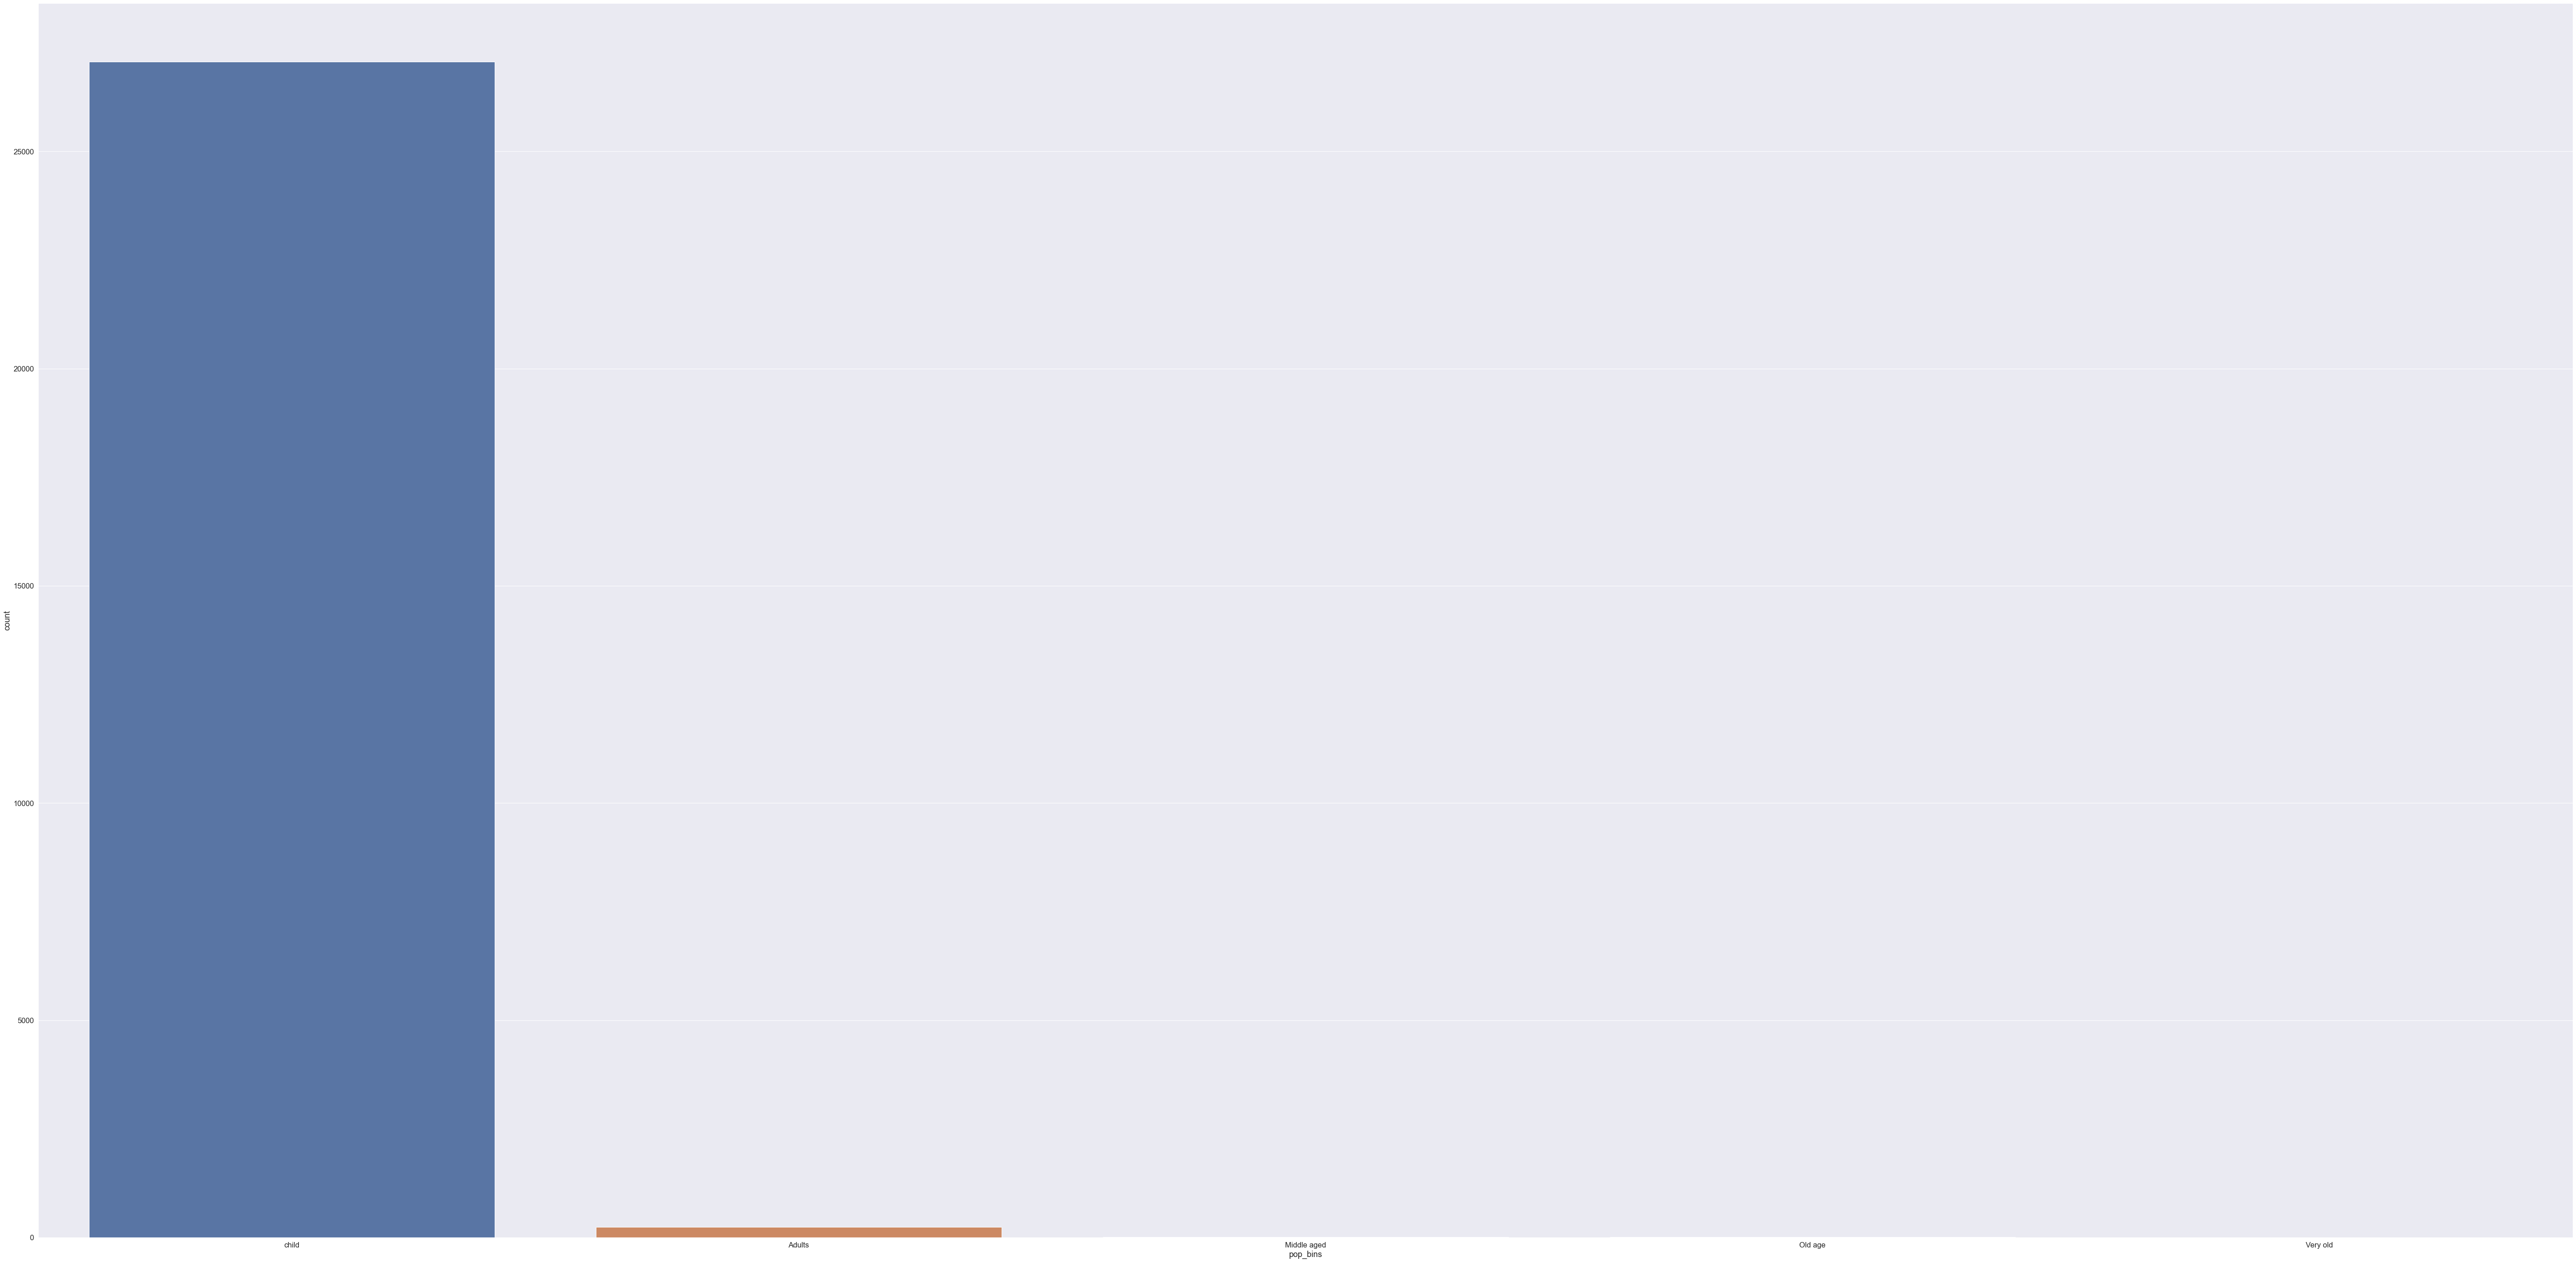

In [667]:
plt.figure(figsize=(100,50))
sns.countplot(x='pop_bins',data=train)

<Figure size 720x360 with 0 Axes>

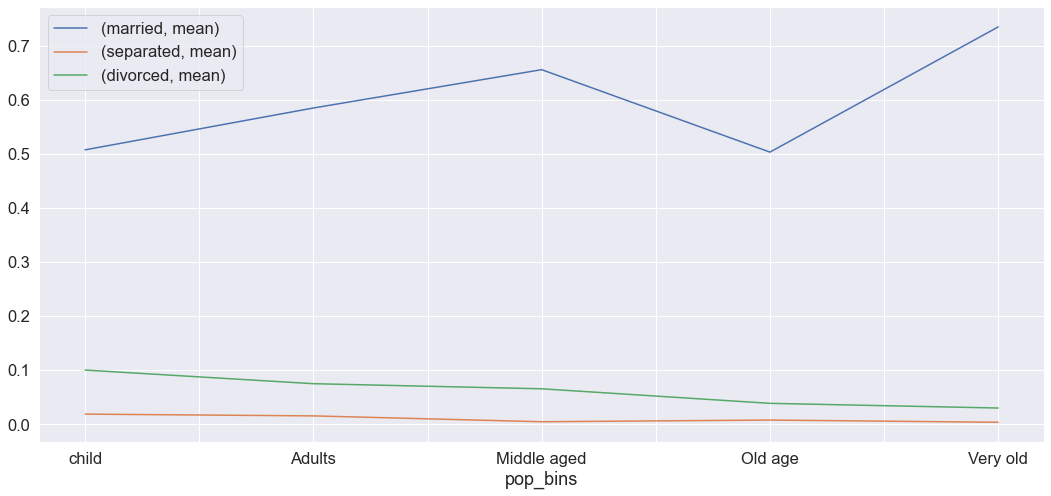

In [668]:
plt.figure(figsize=(10,5))
pop_bin_married=train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(18,8))
plt.legend(loc='best')
plt.show()

No handles with labels found to put in legend.


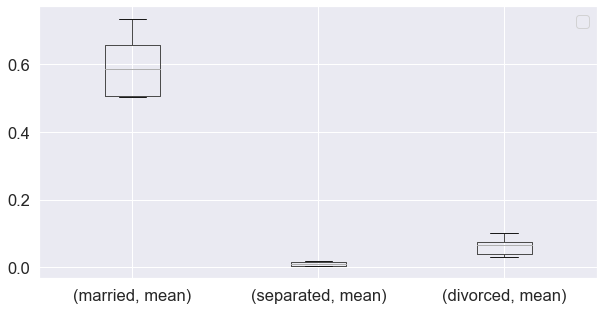

In [669]:
plt.figure(figsize=(10,5))
pop_bin_married=train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.boxplot(figsize=(18,8))
plt.legend(loc='best')
plt.show()

In [670]:
pop_bin_married

,married,separated,divorced
,mean,mean,mean
pop_bins,,,
child,0.507548,0.019126,0.100504
Adults,0.584894,0.015833,0.075348
Middle aged,0.655737,0.005003,0.065927
Old age,0.503359,0.008141,0.039030
Very old,0.734740,0.004050,0.030360


Week 2, 3

In [671]:
rent_state_mean=train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [672]:
income_state_mean=train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [673]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head(10)

state
Alabama                 1.154713
Alaska                  1.286963
Arizona                 1.497041
Arkansas                1.113123
California              1.678314
Colorado                1.352930
Connecticut             1.263667
Delaware                1.292927
District of Columbia    1.319798
Florida                 1.577188
Name: mean, dtype: float64

In [674]:
sum(train['rent_mean'])/sum(train['family_mean'])*100

1.3358170721473863

Week 2, 4

In [675]:
cor=train[['COUNTYID','STATEID','zip_code','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()


In [676]:
cor.head()

,COUNTYID,STATEID,zip_code,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
COUNTYID,1.000000,0.224549,0.036527,-0.002662,-0.075688,-0.039283,-0.123939,-0.086231,-0.062703,-0.063521,-0.004632,-0.021428,0.069059,0.048850
STATEID,0.224549,1.000000,-0.261465,-0.036599,-0.071612,-0.112512,-0.145301,-0.160532,0.014132,-0.017172,0.069314,0.025763,0.030409,0.018748
zip_code,0.036527,-0.261465,1.000000,0.083058,-0.024658,0.067693,-0.073191,0.057775,-0.077672,-0.126150,-0.069965,0.030217,-0.048023,0.043310
pop,-0.002662,-0.036599,0.083058,1.000000,0.128173,0.079675,0.099352,0.231013,0.049238,-0.162499,0.088457,0.167656,-0.083182,-0.160931
family_mean,-0.075688,-0.071612,-0.024658,0.128173,1.000000,0.074703,0.458973,0.378871,0.634493,0.300215,0.450961,0.480095,-0.323433,-0.353274


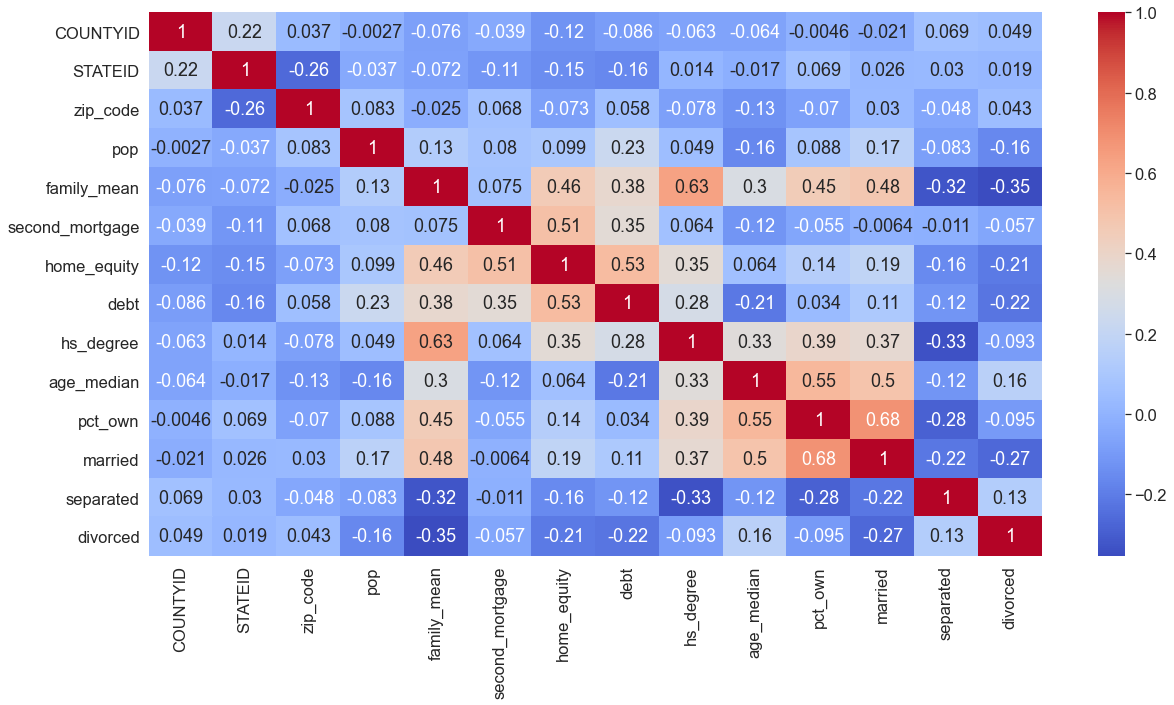

In [677]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

# Week 3 

In [679]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [680]:
train.drop(columns = ['bins'],inplace = True)

In [681]:
num_train = train.select_dtypes(include=[np.number])

cat_train = train.select_dtypes(exclude=[np.number])

In [682]:
num_train.isna().sum().sum()

0

In [683]:
cat_train.isna().sum().sum()

0

In [684]:
cat_train.columns

Index(['state', 'state_ab', 'city', 'place', 'type', 'primary', 'pop_bins'], dtype='object')

In [685]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(num_train)
chi_square_value, p_value

(6170753.4790791385, 0.0)

# In this Bartlett’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [688]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(num_train)

In [689]:
kmo_model

0.038998604403673504

In [690]:
num_train_corr = num_train.corr()
num_train_corr.style.background_gradient(cmap='coolwarm')

In [692]:
num_train_corr =train[['rent_mean','hi_mean','family_mean','hc_mean','home_equity',
                       'pct_own','bad_debt','second_mortgage',
                       'hs_degree','age_median','married','separated','divorced']]

In [693]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(num_train_corr)
kmo_model

0.7717683056106918

# The overall KMO for the data is 0.77, which is excellent. This value indicates that you can proceed with your planned factor analysis

In [695]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(num_train_corr,13)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [696]:
ev, v = fa.get_eigenvalues()
ev

array([5.18522254, 2.16827475, 1.46173625, 0.93389327, 0.90584096,
       0.52598356, 0.51654345, 0.43215147, 0.35544932, 0.28808425,
       0.18621668, 0.0282454 , 0.01235812])

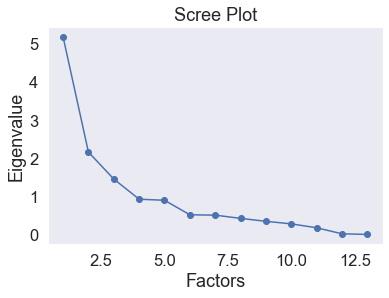

In [697]:
plt.scatter(range(1,num_train_corr.shape[1]+1),ev)
plt.plot(range(1,num_train_corr.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Referring Scree plot: There are only six values after the elbow. Therefore, we will choose only 6 factors (or unobserved variables).

In [699]:
fa1 = FactorAnalyzer(rotation="varimax", n_factors=6)
fa1.fit(num_train, 6)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [700]:
fa1.loadings_

array([[-1.09432115e-01,  1.93949459e-02, -4.64573947e-02,
        -4.29027569e-02, -2.79076790e-02, -1.00460167e-01],
       [-1.23104929e-01,  2.87202725e-03,  3.65680827e-02,
        -1.37625937e-01, -2.33632877e-02, -1.34006826e-01],
       [-4.51998660e-02,  6.61079027e-02, -1.72322485e-01,
        -1.61932667e-02, -2.68704622e-02,  1.61630301e-02],
       [ 3.01988963e-02,  2.81957883e-02, -3.73205283e-02,
         3.20440177e-02, -4.54355341e-02, -3.26750533e-02],
       [ 1.09366009e-01, -9.61225722e-02,  1.15843043e-02,
        -1.45754804e-01,  2.92821798e-02,  2.18729127e-01],
       [-3.99165985e-02, -5.50650947e-02,  1.68695798e-01,
        -2.11805733e-02, -2.20360888e-04, -5.32280651e-02],
       [-4.43692175e-02, -2.29612211e-02,  2.85780393e-02,
        -8.99955219e-02, -4.49572770e-02, -8.18480233e-02],
       [-4.14272075e-03, -1.59076930e-02, -3.50437359e-03,
        -3.93544952e-02, -1.37938136e-02, -3.30541856e-02],
       [ 1.16170158e-01,  9.60161702e-01, -1.384

# Week 4

In [701]:
train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [702]:
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train.replace(type_dict,inplace=True)

In [703]:
test['type'].unique()

array(['CDP', 'City', 'Borough', 'Town', 'Village', 'Urban'], dtype=object)

In [704]:
test.replace(type_dict,inplace=True)

In [705]:
test['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [711]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'hc_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [712]:
x_train=train[feature_cols]
y_train=train['hc_mortgage_mean']

In [713]:
x_test=test[feature_cols]
y_test=test['hc_mortgage_mean']

In [714]:
#test.drop(columns=['SUMLEVEL'],inplace = True)

In [715]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [716]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [717]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [718]:
y_pred=linereg.predict(x_test_scaled)

In [719]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.803593342244987
Overall RMSE of linear regression model 278.0661334339968


In [721]:
country=train['COUNTYID'].unique()
country[0:5]

array([ 53, 141,  63, 127, 161], dtype=int64)

In [722]:
for i in [53,141,127]:
    print("COUNTYID-",i)
    
    x_train_nation=train[train['COUNTYID']==i][feature_cols]
    y_train_nation=train[train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=test[test['COUNTYID']==i][feature_cols]
    y_test_nation=test[test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for Country,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for Country,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

COUNTYID- 53
Overall R2 score of linear regression model for Country, 53 :- 0.7178251803646442
Overall RMSE of linear regression model for Country, 53 :- 250.1716973504592


COUNTYID- 141
Overall R2 score of linear regression model for Country, 141 :- 0.6756217160677512
Overall RMSE of linear regression model for Country, 141 :- 193.4171871871199


COUNTYID- 127
Overall R2 score of linear regression model for Country, 127 :- 0.5841198902536585
Overall RMSE of linear regression model for Country, 127 :- 223.54520787783844




In [723]:
state=train['STATEID'].unique()
state[0:5]

array([36, 18, 72, 20,  1], dtype=int64)

In [724]:
for i in [36,18,72]:
    print("STATEID-",i)
    
    x_train_nation=train[train['STATEID']==i][feature_cols]
    y_train_nation=train[train['STATEID']==i]['hc_mortgage_mean']
    
    x_test_nation=test[test['STATEID']==i][feature_cols]
    y_test_nation=test[test['STATEID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for State,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for State,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

STATEID- 36
Overall R2 score of linear regression model for State, 36 :- 0.7185392201561699
Overall RMSE of linear regression model for State, 36 :- 407.17921265221037


STATEID- 18
Overall R2 score of linear regression model for State, 18 :- 0.8084411920614942
Overall RMSE of linear regression model for State, 18 :- 120.2778747113227


STATEID- 72
Overall R2 score of linear regression model for State, 72 :- 0.6533627763504708
Overall RMSE of linear regression model for State, 72 :- 198.4089059954288




# r2 is greater than 60%

In [725]:
residuals=y_test-y_pred
residuals

UID
255504     96.054201
252676   -160.015324
276314    257.748000
248614    -10.276418
286865   -220.649829
             ...    
238088   -164.537016
242811    -99.911819
250127    -99.780326
241096   -204.987267
287763     27.324985
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([3.000e+00, 8.000e+00, 7.900e+01, 3.242e+03, 7.316e+03, 9.280e+02,
        1.010e+02, 2.300e+01, 6.000e+00, 3.000e+00]),
 array([-2087.86268743, -1599.69961287, -1111.53653831,  -623.37346375,
         -135.21038919,   352.95268537,   841.11575993,  1329.27883449,
         1817.44190905,  2305.60498361,  2793.76805817]),
 <BarContainer object of 10 artists>)

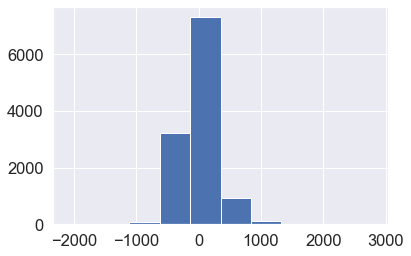

In [726]:
plt.hist(residuals) 

C:\Users\QUANTUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='hc_mortgage_mean', ylabel='Density'>

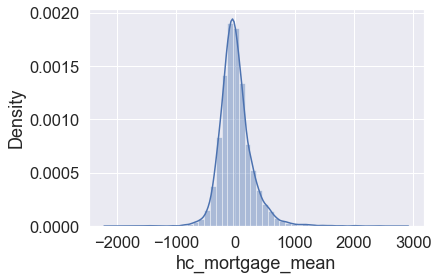

In [727]:
sns.distplot(residuals)

# pricted variable is mormally distributed

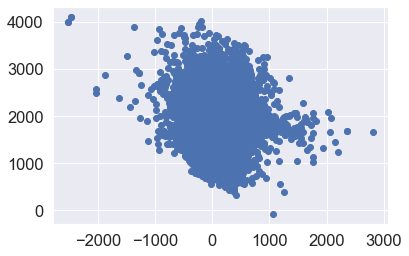

In [141]:
plt.scatter(residuals,y_pred)